# Clustering

En este notebook estudiaremos cómo utilizar scikit-learn para aplicar los distintos algoritmos de clustering vistos en clase.

## Generación de los datos

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Fijar generador de números aleatorios para obtener siempre los mismos resultados
np.random.seed(7)  

Vamos a generar 500 puntos bidimensionales aleatorios usando 3 distribuciones Gaussianas distintas. Como cada distribución tiene un centro y una desviación típica distintas, los puntos quedarán concentrados en distintas zonas del plano.

In [3]:
# La función make_blobs permite generar puntos aleatorios siguiendo varias distribuciones Gaussianas. 
# Devuelve dos valores:
#  X contiene las coordenadas de los puntos generados
#  label números que indican la distribución que generó cada punto
real_centers = [[1, 2], [5, 5], [3, 11]]
stds = [1, 0.7, 1.7]
X, labels = make_blobs(n_samples = 500, centers = real_centers, cluster_std = stds)

print('Número de elementos:', len(X))
print('Primeros elementos de X:', X[0:10])
print('Primeras elementos de labels:', labels[0:10])

Número de elementos: 500
Primeros elementos de X: [[ 4.00755551 14.99817441]
 [ 2.75846364 10.0981121 ]
 [ 4.41896537  3.92872091]
 [ 0.69980626  0.82001791]
 [ 2.80810927  9.42623428]
 [ 1.97309315  2.09701957]
 [ 4.33932013  4.11786692]
 [ 4.81517561 12.84931822]
 [ 1.10143399  2.25257774]
 [ 4.69823619  4.54989312]]
Primeras elementos de labels: [2 2 1 0 2 0 1 2 0 1]


A continuación dibujamos los puntos en el plano. El color de cada punto indica la distribución a partir de la cual fue generado.

In [23]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','w','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

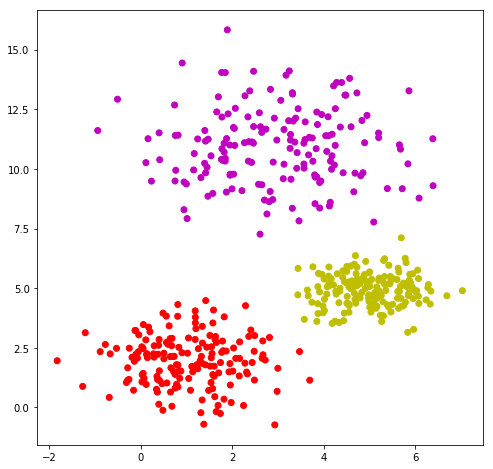

In [24]:
plot_clusters(X, labels)

Recuerda que los algoritmos de clustering se utilizan para encontrar patrones en datos no etiquetados. A partir de ahora "olvidaremos" la distribución que utilizamos para generar cada punto y trataremos de buscar distintas agrupaciones sólo a partir de sus coordenadas

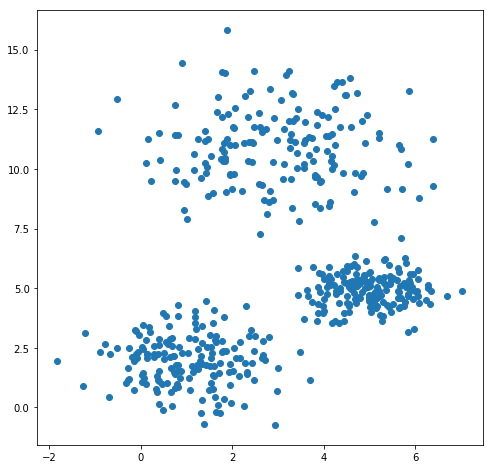

In [25]:
plot_clusters(X)

## Algoritmo k-Means

El algorithmo k-means agrupa los datos en K grupos disjuntos, minimizando la suma de distancias dentro de cada cluster. Recibe como parámetro el número de clusters que debe crear.

Descripción del algoritmo: https://scikit-learn.org/stable/modules/clustering.html#k-means

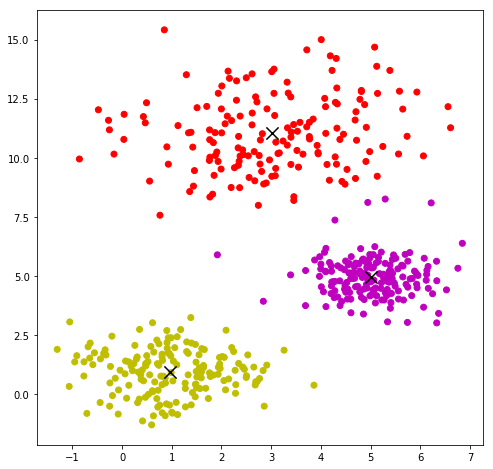

In [6]:
# Crear una instancia del agrupador k-means
km = KMeans(init='random', n_clusters=3)

# Agrupar los puntos en clusters
km.fit(X)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
centers = km.cluster_centers_

plot_clusters(X, labels, centers)

Cuando usamos k-means tenemos que especificar el número de clusters que queremos crear y a veces no sabemos cuántas agrupaciones deberíamos crear. Una opción es realizar varias agrupaciones con distintos valores de K y estudiar cómo de homogéneos son los clusters resultantes. 

En el siguiente ejemplo generamos agrupaciones con valores de K entre 2 y 7, y estudiamos cómo aumenta el índice de Silhouette que se basa en el cálculo de distintas de cada punto a los puntos de su cluster y a los puntos del cluster más cercano. Es un valor entre -1 y 1, cuanto más alto mejor.

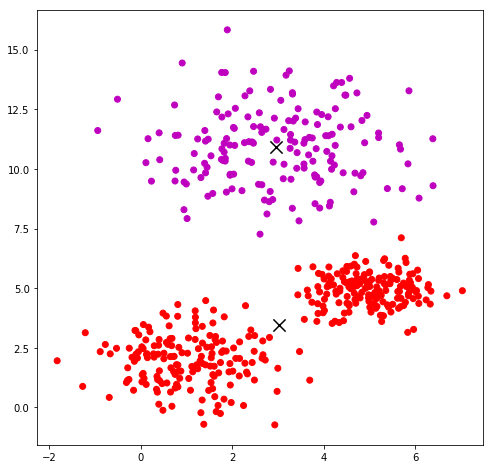

0.5950388414893474


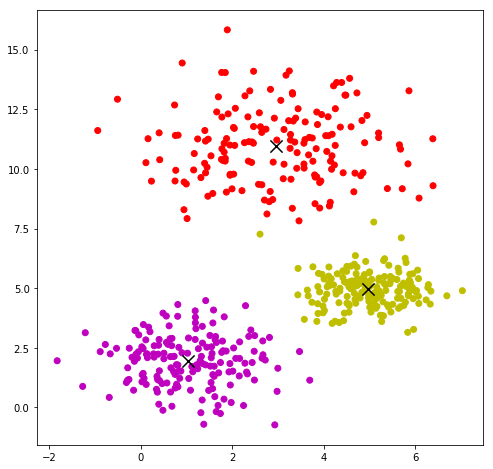

0.6470951156260328


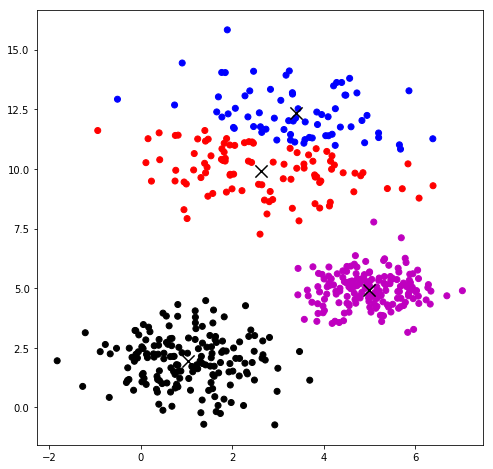

0.5641731061707722


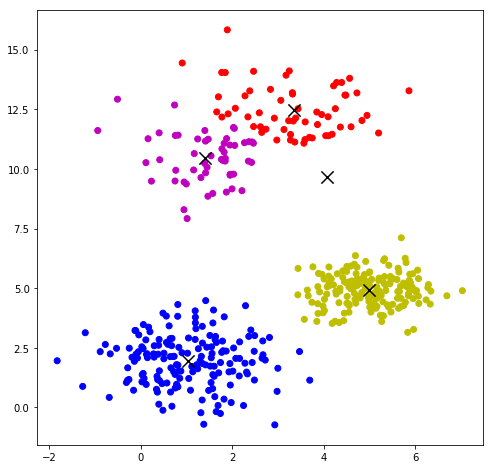

0.5731832465344932


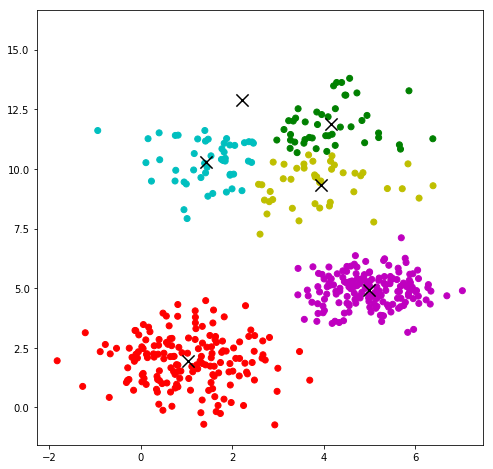

0.5650320342703662


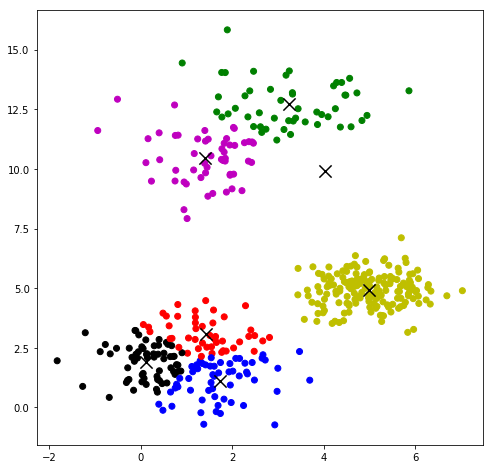

0.45350192938452266


In [26]:
K_MAX = 8
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k)
    km.fit(X)
    plot_clusters(X, km.labels_, km.cluster_centers_)
    
    silhouette[k-2] = silhouette_score(X, km.labels_) 
    print(silhouette_score(X, km.labels_))

A continuación pintamos el valor del índice de Silhouette para distintos valores de K. Podemos observar que el mejor valor (el más alto) se obtiene para k = 3 y es coherente porque generamos los datos a partir de 3 distribuciones distintas.

Text(0.5, 1.0, 'Valor de Silhouette para diferentes k')

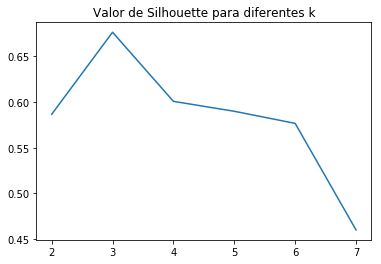

In [8]:
plt.plot(range(2, K_MAX), silhouette)
plt.title('Valodata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX0AAAEICAYAAACzliQjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3Xl8VeW1//HPSkhIAiFhxoR5EEWQKTjUtlJbLVhFrVertlZsHTpQ7W3r1P5ube1gJ2+tVVuVFrVV1Kq1aFvHitX2WojMIAgiCgFDGBICJBCS9fvj7IRDzHAgwz7D9/16nVdy9vSsfU6ynn2evc7e5u6IiEhqSAs7ABER6TxK+iIiKURJX0QkhSjpi4ikECV9EZEUoqQvIpJClPQTkJkNNTM3sy4dtP2ZZvZaB2z3I2a2Jur5BjP7RPD798zsj+3dZqpr/LdiZn83s8ui5v/QzLaZ2fvhRdm+OurvN1ko6YfAzJ41s1uamH6Omb3fUcm8M5jZcWb2vJntMLNyM3vDzM4EcPdX3X102DFGM7P7zeyHjaY1dEbJxt2nu/sDAGY2GPgmMMbdB3R2LGY238yu6Ox2U52SfjgeAD5nZtZo+qXAQ+5+oKMa7oQO5WngBWAA0A+4BtjVwW0mJYvoyP/RwcB2d996uCt2QmzSQfSmheMpoDfwkfoJZtYTOAt4MHj+KTNbbGa7zGyjmX2vuY2ZWYGZzQuOrteZ2ZVR875nZo+b2R/NbBcws4n1ewfr7zKzBcCIRvOPMbMXgu2vMbMLm4mjDzAMuM/d9wePf7n7a8H8qWa2qYXXJdPMHjSzSjNbaWZFUds+NjgyLA/mzYiad8gRY+OP983Fb2ZXAZ8Frjez3Wb2tJn9gUgyfDqYdn2w7Elm9u+g/aVmNrW5nQg+KdxkZqvMbKeZzTGzrGBeTzN7xszKgnnPmNnARvvyIzP7F7AXGG5ml5vZm8Hrst7Mrm6h7XQz+0UwZLMe+FSj+fPN7Irgk8wLQEGwn/e3tp/NxJZnZr8zsy1mVmKR4aL06PchiGenmb1jZtODeT8i8vd/Z9D+nS29V8G8M4PXtDJo61vNvQ6N9vnnQRx5sSyf9NxdjxAewH3A7KjnVwNLop5PBcYR6ZiPB0qBc4N5QwEHugTP/wncDWQBE4Ay4LRg3veAGuDcYFvZTcTyCPAY0A0YC5QArwXzugEbgcuBLsBEYBuRIYHG2zFgLfBM0F7/RvOnApuinm8APhEVZzVwJpAO3Aq8HszLANYB3wYygdOASmB0MH8+cEXUdmfGGj9wP/DDRnE2xBU8LwS2B7GlAacHz/s2895uAFYAg4BewL/q2yDS2Z8P5AC5wJ+Ap6LWnQ+8BxwXxJtBJHGPCF7fU4kk3EnNtP0lYHVU2y83+ltpeK2aeD9a3M9mYvszcE/wOvcDFgBXR70PNcCVwXv6ZWAzYM28b629V1uAjwS/92zhNZgJvBbsw33Ac0BO2P/z8fLQkX54HgD+q/4IEPh8MA0Ad5/v7svdvc7dlwFzifzDH8LMBgGnADe4e7W7LwFmB9ur93/u/lSwrapG66cTSULfdfc97r4iOg4inz42uPscdz/g7ouBJ4ALGsfikf+4jxFJercBW8zsn2Y2KsbX5DV3/5u71wJ/AMYH008CugM/8cinh38Q6VgujmGbMcffgs8Bfwtiq3P3F4BiIsmxOXe6+0Z33wH8qD5Wd9/u7k+4+153rwzmNX5f73f3lUG8Ne7+V3d/2yNeAZ4n6lNiIxcCt0e1fWs772dDbEQ6lTOBrwd/O1uBXwIXRS3/rrvfF7ynDwBHAf2bab+196oGGGNmPdx9p7svamFfMoj8z/QCznb3vYfxOiQ1Jf2QeGTIYxtwrpmNAE4AHq6fb2YnmtnLwTBABZEjuD5NbKoA2BEkkHrvEjlqq7exhVD6Ejmqil7m3ajfhwAnBh/3y82snMiQSJMn/tx9k7vPcvcRwbp7CIasYhBdQbIXyLLIOYgCYKO71zWKMXofm3NY8bewjQsabePDRBJYcxq/ngUAZpZjZveY2bsWGW77J5BfPyTSxLqY2XQzez0Y8ignkmib+lsgaKe597I1seznxkbLZxDp3OuXv4fIEX+9hvc0KvF2b6H9lt6r84ns+7tm9oqZndzCvowEzgG+7+77W1gu5SRslUiSeJDIEflo4Dl3L42a9zBwJzDd3avN7Haa/kffDPQys9yoxD+YyBBNvZYupVoGHCAyHLA6av16G4FX3P30GPfpYKPuG83sLiJHXG2xGRhkZmlRiX8w8Fbw+x4iwyX1ohN6a/E39do0nrYR+IO7X9nEss0ZFPX7YCL7AJFqmdHAie7+vplNABYTGbr5QPtm1pXI0e7ngb+4e42ZPdVo+Whbmmg7VrHsZ/RrsxHYB/TxIys+aOp1bva9cveFwDlmlgHMIjIkOaipZYE3gbuAv5vZae6+ppnlUo6O9MP1IPAJImOeDzSal0vkCL7azE4ALmlqA+6+Efg3cKuZZZnZ8cAXgZhq3oOP3U8C3wuOQscAl0Ut8gxwtJldamYZwWOKmR3beFvBScrvm9lIM0uzyIndLwCvxxJLC/5D5Mj/+qD9qcDZRM5FACwBPh3EP5LI/scafykwvFF7jaf9ETjbzD4ZnCjNsshJ6YE076tmNtDMegHfAR4NpucCVUB5MO/mVvY9E+hK0DkHJ0LPaGH5x4BrgrZ7Aje2sv1oh7Wf7r6FyFDTbWbWI3jPR5jZB4Yhm9H4dW72vTKzTDP7rJnluXsNkYqwuia3ejC+uUTOA70YfJoWlPRD5e4biCTsbsC8RrO/AtxiZpXAd4n8MzfnYiIndzcTObF2s7u/eBihzCLykft9Iic250TFWEkkyVwUbP994KdEElFj+4M4XiTyT7mCyJHgzMOI5QOCj+dnA9OJDIndDXze3es/mfwyaLuUSOf50GHE/zsi48TlwRE0RMbB/18w7VtBx3oOkQRSRuSI9Dpa/v95mEhCXA+8DdR/F+B2IDvYj9eBZ1vZ90oiZa+PATuJdP6N/1ai1Z+4XAosItKhx+QI9/PzRDqmVUF8j9PysFe0XxE5r7XTzO6I4b26FNgQDIt9icjQT2v79ABwC/APMxsaY1xJrf4suoi0EzPbQKQq5XA6XpFOoSN9EZEUoqQvIpJCNLwjIpJCdKQvIpJC4q5Ov0+fPj506NCwwxARSShvvPHGNnfv29pycZf0hw4dSnFxcdhhiIgkFDOL6dvXGt4REUkhSvoiIilESV9EJIUo6YuIpBAlfRGRFKKkLyKSQpT0RURSiJJ+AquuqeXRhe+xq7om7FBEJEEo6SewH/51FTc8sZyrHixm34HasMMRkQSgpJ+g/rpsC398/T1OGt6L19fv4Lo/LaOuThfPE5GWKeknoPe27+XGJ5YxcXA+f/jiiVz3ydHMW7qZnz2n24CKSMvi7to70rL9B+qYNXcRZnDHRRPJSE/jK1NHUFJexW9feZvC/CwuPXlo2GGKSJxS0k8wP3t2Ncs2VfDbz01mUK8cAMyMW2YcR2lFNTfPW8mAvGxOH9M/5EhFJB5peCeBvLiqlNmvvcNlJw9h2tgBh8zrkp7Gry+ZyLjCPL42dxGL39sZUpQiEs+U9BPE5vIqvvX4Uo4r6MFNZx7b5DI5mV2YfdkU+uVm8cUHitmwbU8nRyki8U5JPwEcqK3jmrmLqTlQx52XTCIrI73ZZfvmduX+y6fg7sycs4Dtu/d1YqQiEu+U9BPAL198i+J3d/LjT49jWJ9urS4/vG93Zl9WxJaKar74QDFV+1XDLyIRSvpx7p9vlXH3/Le5aMogzplQGPN6k4f04lcXTWTppnKueWQxtarhFxGU9OPa1spqvvHYEkb1687NZx932OtPGzuAm88awwurSvn+0ytxV+IXSXUq2YxTtXXO1x9Zwu59B5h75UlkZzY/jt+SmacMo6S8ivtefYfC/GyuPnVEO0cqIolEST9O3f3yOv799nZ+dv7xjOqf26Zt3TT9WDZXVHPr31czIC/rsIaJRCS5KOnHof+s384vX3yLcycUcEHRwDZvLy3NuO2C8ZRV7uO6Py2jX24WJ4/o3Q6Rikii0Zh+nNm+ex/XPLKYIb278cPzxmFm7bLdrIx07r10MoN753DVH4p5q7SyXbYrIolFST+O1NU53/zTUnbureHOSybSvWv7fhDLz8nk/sunkJWRzszfL6B0V3W7bl9E4p+SfhyZ/dp65q8p438+dSzHFeR1SBsDe+YwZ+YUKqpqmDlnIZW6AYtISlHSjxOL3tvJz55dw/SxA/jcSUM6tK2xhXnc/bnJvFVayVceWkRNbV2Htici8UNJPw5U7K3haw8vZkBeFj85//h2G8dvyalH9+XWT4/j1bXbuPGJ5arhF0kRqt4JmbtzwxPLKN1VzeNf/hB52Rmd1vaFRYPYXF7F7S+upbBnNt84/ehOa1tEwqGkH7I/vP4uz658n++ceSwTBuV3evvXfnwUm8uruOOltRTkZXHRCYM7PQYR6TwxDe+Y2TQzW2Nm68zsxmaWudDMVpnZSjN7OGp6rZktCR7z2ivwZLCipIIfPvMmpx3Tjy9+eFgoMZgZPzpvHB89ui/feWoFL6/ZGkocItI5Wk36ZpYO3AVMB8YAF5vZmEbLjAJuAk5x9+OAr0fNrnL3CcFjRvuFnth27zvArIcX0atbJr+4YDxpaR0/jt+cjPQ07v7sJI4ZkMtXH1rE8k0VocUiIh0rliP9E4B17r7e3fcDjwDnNFrmSuAud98J4O46XGyBu/PtJ5fz3o693HHxRHp1yww7JLp37cKcmVPomZPJ5fcvZOOOvWGHJCIdIJakXwhsjHq+KZgW7WjgaDP7l5m9bmbTouZlmVlxMP3cphows6uCZYrLysoOawcS0WPFG5m3dDPfOP1oThjWK+xwGvTrkcUDX5jC/gO1XDZnAeV794cdkoi0s/Yq2ewCjAKmAhcD95lZ/VnJIe5eBFwC3G5mH7jMo7vf6+5F7l7Ut2/fdgopPr1VWsnN81ZyysjefHnqyLDD+YCR/XK57/NFbNpRxZUPFlNdoxuwiCSTWJJ+CTAo6vnAYFq0TcA8d69x93eAt4h0Arh7SfBzPTAfmNjGmBNW1f5avvrQIrp37cIvPzOB9BDH8Vty4vDe3HbheBZu2Mk3H1tKnW7AIpI0Ykn6C4FRZjbMzDKBi4DGVThPETnKx8z6EBnuWW9mPc2sa9T0U4BV7RR7wvnevJWsK9vN7Z+ZSL/crLDDadHZ4wv4zpnH8tflW/jx394MOxwRaSet1um7+wEzmwU8B6QDv3f3lWZ2C1Ds7vOCeWeY2SqgFrjO3beb2YeAe8ysjkgH8xN3T8mk/9TiEh4t3sisj43kw6P6hB1OTK74SOQGLLNfe4eC/Gy+EFJZqYi0H4u3r98XFRV5cXFx2GG0q/Vluzn7168xpqAHc688iS7piXP1i9o65ysPvcHzq0q5+5JJTB93VNghiUgTzOyN4PxpixIn+ySo6ppaZj28mMwuadxx8cSESvgA6WnGry6ayMRB+Vz76BKKN+wIOyQRaYPEykAJ6Md/e5NVW3Zx24XjOSovO+xwjkhWRjqzL5tCYX42VzxYzNtlu8MOSUSOkJJ+B3p2xRYe/L93ueLDwzjtmP5hh9MmvbpFbsCSbsZlv1/A1krdgEUkESnpd5CNO/Zy3ePLGD8wj+unHRN2OO1iSO9u/H7mFLbv3s8X7y9mz74DYYckIodJSb8D7D9Qx6y5iwG485JJZHZJnpd5/KB87rxkIis3VzDr4UUc0A1YRBJK8mSjOPKL59ewdGM5Pz3/eAb1ygk7nHb38WP784Nzx/LymjL+5y8rdAMWkQSi6+m3s3+sLuXef67n0pOGcGYSlzd+9sQhlOys4u75b1OYn82s00aFHZKIxEBJvx1tqajim48t5dijevCdTx0bdjgd7rpPjmZLRTW/eP4tjsrL5vzJA8MOSURaoaTfTg7U1nHt3CXsO1DHXZdMJCsjPeyQOpyZ8dPzj6d0VzU3PLGMfj268pFRyX3BPJFEpzH9dnLHS2tZsGEHPzpvLMP7dg87nE6T2SWN3146mZH9uvPlPy5i1eZdYYckIi1Q0m8H/1q3jV+/vI4LJg/kvImpN8TRIyuDOZdPoXvXLlx+/wI2l1eFHZKINENJv43KKvdx7SNLGNG3O98/57iwwwnNUXnZ3P+FKezdV8vMOQuoqKoJOyQRaYKSfhvU1Tn//egSKqtruOuSSeRkpvYpkmMG9OCeSyfzzrY9XP2HYvYd0A1YROKNkn4b/OaVt3lt3Ta+P+M4Rg/IDTucuPChkX342X8dz+vrd3D948t0AxaROJPah6ZtsOCdHdz2/BpmjC/gM1MGtb5CCjlv4kA2l1fz8+fWUJCfzQ1JchkKkWSgpH8Edu7Zz7WPLGZwrxx+dN5YzOLztodh+srUEZSUV/Gb+W9TkJ/NpScNCTskEUFJ/7C5O9/601K2797Pk1/5ELlZGWGHFJfMjFtmHEdpRTU3/2UFA3pkcfqYxL7SqEgy0Jj+Yfrda+/w0uqtfPvMYxhbmBd2OHGtS3oav75kIuMK8/ja3EUsfm9n2CGJpDwl/cOwZGM5P312NWeM6c9lHxoadjgJISezC7Mvm0K/3CyueKCYDdv2hB2SSEpT0o9RRVUNX5u7iH65Wfz8v8ZrHP8w9M3tyv2XT6HOnZlzFrB9976wQxJJWUr6MXB3bnpyGVvKq/n1JRPJy9E4/uEa3rc7sy8rYktFNVc8WEzVftXwi4RBST8Gf/zPe/xt+ftc98nRTBrcM+xwEtbkIb341UUTWbKxnGseWUytavhFOp2SfitWbq7gB8+sYurovlz5keFhh5Pwpo0dwM1njeGFVaV8/+mVugGLSCdTyWYL9uw7wNceXkzPnAxuu2A8aWkax28PM08ZRkl5Ffe9+g6F+dlcfeqIsEMSSRlK+s1wd/7fUyvYsH0PD195Er27dw07pKRy0/Rj2VxRza1/X81R+dnMGF8QdkgiKUFJvxmPv7GJPy8u4b8/cTQnDe8ddjhJJy3NuO2C8ZRV7uNbjy2lX25Xvc4inUBj+k1YW1rJd/+ykpOH92bWaSPDDidpZWWkc++lkxncO4erHizmrdLKsEMSSXpK+o1U7a9l1sOLyclM51cXTSBd4/gdKj8nk/svn0LXjHRm/n4Bpbuqww5JJKkp6TdyyzMrWVNayS8/M4F+PbLCDiclDOyZw5yZU6ioqmHmnIVUVusGLCIdRUk/yrylm5m7YCNfnjqCjx6tG3x3prGFedz9ucm8VVrJVx5aRE1tXdghiSQlJf3Ahm17+PaTy5k8pCffOP3osMNJSace3ZdbzxvHq2u3cdOTy1XDL9IBVL0D7DtQy6y5i0hPM+64eCIZ6eoLw3LhlEGUlFfxq5fWUpCfrQ5YpJ0p6QO3/m01K0p2cd/niyjMzw47nJT39U+MYnN5FXe8tJbC/Cw+M2Vw2CGJJI2UT/rPrXyf+/+9gS+cMkw3+YgTZsaPPz2O0sp9fPvPK+jXI4uPje4XdlgiSSGlxzE27dzLdX9ayvED87hxuu7jGk8y0tO4+7OTGN0/l68+tIgVJRVhhySSFFI26dfU1vG1uYtxh19fPJHMLin7UsSt7l27cP/lU+iZk8nMOQvZuGNv2CGJJLyUzXS/eH4Ni98r59bzxzGkd7eww5Fm9OuRxQNfmML+A7XMnLOA8r37ww5JJKHFlPTNbJqZrTGzdWZ2YzPLXGhmq8xspZk9HDX9MjNbGzwua6/A22L+mq3c88p6LjlxMGcdrwt9xbuR/XK57/NFbNxRxZUPFlNdoxuwiBypVpO+maUDdwHTgTHAxWY2ptEyo4CbgFPc/Tjg68H0XsDNwInACcDNZhbqXUhKd1XzjceWcsyAXL571pjWV5C4cOLw3tx24XgWbtjJNXMXs+CdHezYo6N+kcMVS/XOCcA6d18PYGaPAOcAq6KWuRK4y913Arj71mD6J4EX3H1HsO4LwDRgbvuEf3hq65xr5i6man8td14yiayM9DDCkCN09vgCSndV88O/vsnzq0oB6N0tk5H9ujOqf3dG9cuN/N6vO31zu+o+xiJNiCXpFwIbo55vInLkHu1oADP7F5AOfM/dn21m3cLGDZjZVcBVAIMHd1xN9h0vreU/7+zgtgvGM7Jf9w5rRzrOFR8ZzlnHF7CmtJK1pZWs27qbdVt3M2/JZnZVH2hYrkdWF0b1z2VUv+6MDB6j+udSkJelzkBSWnvV6XcBRgFTgYHAP81sXKwru/u9wL0ARUVFHfLd+3+v28Yd/1jL+ZMGcv7kgR3RhHSSAXlZDMjL4tSo6yO5O2W797GudDdrt+5m7dZIh/Dim6U8svDgcUe3zHRG1HcC/SKdwqj+3RnYM0dXVJWUEEvSLwEGRT0fGEyLtgn4j7vXAO+Y2VtEOoESIh1B9LrzjzTYI7Vt9z6ufXQJw/t045Zzjuvs5qUTmBn9crPol5vFh0b2OWTejj37WRfVEazbupt/r9vOk4sO/hl37ZLG8L6RoaH6jmBkv+4M6d1Nl+WQpBJL0l8IjDKzYUSS+EXAJY2WeQq4GJhjZn2IDPesB94Gfhx18vYMIid8O01dnfPfjy6hoqqGB79wAt26pvyXkFNOr26ZnDCsFycM63XI9F3VNQ2dwLqtu1lbWsmi93Yyb+nmhmW6pBnD+nSLdAJ9uzMyGDIa1qebzglJQmo1A7r7ATObBTxHZLz+9+6+0sxuAYrdfV4w7wwzWwXUAte5+3YAM/sBkY4D4Jb6k7qd5Z5/rufVtdv40XljOfaoHp3ZtMS5HlkZTBrck0mDDy0o27v/AOvL9rB2ayVrg+GiN7dU8uyK96kLBh/TDIb07saIvvUnkSPDRSP6dSMnUwcWEr8s3i5fW1RU5MXFxe2yrTfe3cGF97zOtLEDuPPiiTqBJ21SXVPLhu17GjqCdcFw0Tvb9lBTe/D/qDA/+5COYGQwVNQjKyPE6CXZmdkb7l7U2nJJe0hSvnc/X3t4MYX52dz66XFK+NJmWRnpHDOgB8cMOPQTY01tHe9u38u64JPBurLdrC3dzf+9vZ19Bw7eDKZ/j64NZaUjG84d5NKrW2Zn74qksKRM+u7Ot/60jLLd+3jiyx/SEZZ0qIz0tIZEPm3swem1dc6mnXsP6QjWba3kseKN7N1/8FvF9d81iO4I9F0D6ShJmfTn/GsDL75ZynfPGsPxA/PDDkdSVHqaMaR3N4b07sYnOHjZbndnc0V1w8njSGXRbp5e+sHvGjSUlvbvztjCPI4r6EGuDmKkDZIu6S/bVM6tf3+TTxzbn8tPGRp2OCIfYGYU5mdTmJ/d6ncN1pbu5qXVpTxafPC7BsP7dGNsYR7jCvM4rrAHYwvz9GlWYpZUSX9XdQ2zHl5M3+5d+cUFx+ujsSSUlr5rUFa5jxUlFawoqWB5SQXFG3YcUlo6tHdOQ0cQ6QzyyMtWRyAflDRJ39256cnllJRX8ehVJ5Gfo5Njkjz65nblY8f042PHHLyD2Lbdh3YEi98r55llWxrmD+6Vw7jCvIbOYGxhD/1fSPIk/bfL9vDiqlK+ecbRFA3t1foKIgmuT/euTB3dj6lRt5LcsWd/QyewoqSCZSXl/HX5wY5gUK9sxhbkHfKpoKeqh1JKUtXpb9i2h8G9ckjTNVREGpTv3c+Kkl0NHcHykgrei7oLWWF+dqQDGBg5UTyuMI/e3buGGLEciZSs0x/aR3fAEmksPyeTD4/qw4dHHTxPULG3hpWbIx1AfWfw7Mr3G+YX5GUdHBYamMfYgjz65qojSAZJlfRFJDZ5ORl8aGSfQ04YV1TVsGrzrkOGh+rvWwAwoMfBjmDcwEjVUL/crDDClzZQ0hcRAPKyMzh5RG9OHtG7YVpldQ0rg46gvjN4aXUp9aPC/Xt0jVQLFeQ1DBH176GOIJ4p6YtIs3KzMjhpeG9OGn6wI9i97wCrNh88R7CipIJ/rN7acDG6vrldG6qGxhb0YNzAPAb00M1r4oWSvogclu5du3zgUtV79x/sCOo7g/lrDnYEfbpnRpWORh66i1k4lPRFpM1yMrtQNLTXIeXSVftrWbXl0HMEr67dRm3QE/TulslxhXmMK+zR0BkU5merI+hgSvoi0iGyM9OZPKQnk4ccvF9BdU2kI1hZUl85tIt7XlnPgaAj6JmT0fBJ4Iwx/ZnY6F4H0nZJVacvIomnuqaW1e9XsrykoqEzWPN+JWlpxkvfOJVBvXLCDjEhpGSdvogknqyMdCYMymfCoINXxN1SUcVpv3iFn/x9NXd9dlKI0SUf3fFZROLOUXnZfOnUEfx1+RYWvNOpd1hNekr6IhKXrvrocArysrjlmZXU1cXXMHQiU9IXkbiUnZnODdOPYUXJLh5ftCnscJKGkr6IxK0Z4wuYODifnz+3ht37DrS+grRKSV9E4paZ8d2zxlBWuY/fzF8XdjhJQUlfROLaxME9OW9iIfe9+g4boy4JLUdGSV9E4t7100aTbsZP/r467FASnpK+iMQ9lXC2HyV9EUkIV310OEephLPNlPRFJCFkZ6Zzo0o420xJX0QShko4205JX0QShko4205JX0QSiko420ZJX0QSjko4j5ySvogkHJVwHjklfRFJSCrhPDJK+iKSkFTCeWSU9EUkYamE8/Ap6YtIwlIJ5+FT0heRhKYSzsMTU9I3s2lmtsbM1pnZjU3Mn2lmZWa2JHhcETWvNmr6vPYMXkQEVMJ5OFpN+maWDtwFTAfGABeb2ZgmFn3U3ScEj9lR06uips9on7BFRA5SCWfsYjnSPwFY5+7r3X0/8AhwTseGJSJyeFTCGZtYkn4hsDHq+aZgWmPnm9kyM3vczAZFTc8ys2Ize93Mzm2qATO7KlimuKysLPboRUQC0SWcT6iEs1ntdSL3aWCoux8PvAA8EDVviLsXAZcAt5vZiMYru/u97l7k7kV9+/Ztp5BEJNXUl3D+TCWczYol6ZcA0UfuA4NpDdx9u7vvC57OBiZHzSsJfq4H5gMT2xCviEizVMLZuliS/kJglJkNM7NM4CLgkCocMzsq6ukM4M1gek8z6xr83gc4BVjVHoGLiDRFJZwtazXpu/unsqa0AAAJsklEQVQBYBbwHJFk/pi7rzSzW8ysvhrnGjNbaWZLgWuAmcH0Y4HiYPrLwE/cXUlfRDrU9dNGk2bwk2dVwtmYucfXWe6ioiIvLi4OOwwRSXC3v/gWt7+4lseuPpkThvUKO5wOZ2ZvBOdPW6Rv5IpIUrr6oyNUwtkEJX0RSUoq4Wyakr6IJC2VcH6Qkr6IJC2VcH6Qkr6IJDWVcB5KSV9Ekp5KOA9S0heRpNdwFc5lugqnkr6IpASVcEYo6YtISlAJZ4SSvoikjOgSzj0pWsKppC8iKSO6hPPuFC3hVNIXkZSS6iWcSvoiknJSuYRTSV9EUk50CefCDalVwqmkLyIpqaGE8+lVKVXCqaQvIimpvoRzeUlFSpVwKumLSMpKxRJOJX0RSVlmxv+kWAmnkr6IpLRJg3ty7oSClCnhVNIXkZR3w/RjUqaEU0lfRFJeKpVwKumLiJA6JZxK+iIipE4Jp5K+iEggFUo4lfRFRALRJZy/mf922OF0CCV9EZEo9SWc9766PilLOJX0RUQaSeYSTiV9EZFGkrmEU0lfRKQJyVrCqaQvItKE7Mx0bpiWfCWcSvoiIs04Z0LylXAq6YuINCMZSziV9EVEWpBsJZxK+iIirbh+WvKUcCrpi4i0oiA/eUo4lfRFRGKQLCWcMSV9M5tmZmvMbJ2Z3djE/JlmVmZmS4LHFVHzLjOztcHjsvYMXkSksyRLCWerSd/M0oG7gOnAGOBiMxvTxKKPuvuE4DE7WLcXcDNwInACcLOZ9Wy36EVEOtGM8QVMGJTYJZyxHOmfAKxz9/Xuvh94BDgnxu1/EnjB3Xe4+07gBWDakYUqIhKutDTju2cndglnLEm/ENgY9XxTMK2x881smZk9bmaDDmddM7vKzIrNrLisrCzG0EVEOl90CeemnYlXwtleJ3KfBoa6+/FEjuYfOJyV3f1edy9y96K+ffu2U0giIh2jvoTz1r8nXglnLEm/BBgU9XxgMK2Bu293933B09nA5FjXFRFJNIlcwhlL0l8IjDKzYWaWCVwEzItewMyOino6A3gz+P054Awz6xmcwD0jmCYiktAStYSz1aTv7geAWUSS9ZvAY+6+0sxuMbMZwWLXmNlKM1sKXAPMDNbdAfyASMexELglmCYiktCiSzifXJw4AxjmHl89VFFRkRcXF4cdhohIq+rqnE//5t9sLq/i5W9NpVvXLqHFYmZvuHtRa8vpG7kiIkeovoRzawKVcCrpi4i0QaKVcCrpi4i0UcNVOBOghFNJX0SkjQrys7n6oyN4JgFKOJX0RUTawZdOTYwSTiV9EZF2kCglnEr6IiLtpOEqnM+ujturcCrpi4i0k0Qo4VTSFxFpR/FewqmkLyLSzuK5hFNJX0SkncVzCaeSvohIB4jXEk4lfRGRDhCvJZxK+iIiHSQeSziV9EVEOkg8lnAq6YuIdKB4K+FU0hcR6WDxVMKppC8i0sGiSziLQy7hVNIXEekEV586nAE9svh+yCWcSvoiIp0gJ7MLN04Pv4RTSV9EpJPEQwmnkr6ISCeJhxJOJX0RkU40aXBPzgmxhFNJX0Skk90QYgmnkr6ISCcLs4RTSV9EJARhlXAq6YuIhCAnsws3TB/d6SWcSvoiIiE5Z3xhp5dwKumLiIQkuoTzt690Tgmnkr6ISIgaSjj/2TklnEr6IiIhu2HaMVgnlXB26fAWRESkRQX52Vzz8VFU7a/F3TGzDmtLSV9EJA58ZerITmlHwzsiIilESV9EJIUo6YuIpBAlfRGRFBJT0jezaWa2xszWmdmNLSx3vpm5mRUFz4eaWZWZLQkev22vwEVE5PC1Wr1jZunAXcDpwCZgoZnNc/dVjZbLBa4F/tNoE2+7+4R2ildERNogliP9E4B17r7e3fcDjwDnNLHcD4CfAtXtGJ+IiLSjWJJ+IbAx6vmmYFoDM5sEDHL3vzax/jAzW2xmr5jZR5pqwMyuMrNiMysuKyuLNXYRETlMbf5ylpmlAf8LzGxi9hZgsLtvN7PJwFNmdpy774peyN3vBe4NtldmZu+2IaQ+wLY2rJ+IUm2fU21/QfucKtqyz0NiWSiWpF8CDIp6PjCYVi8XGAvMD746PACYZ2Yz3L0Y2Afg7m+Y2dvA0UBxc425e99YAm+OmRW7e1FbtpFoUm2fU21/QfucKjpjn2MZ3lkIjDKzYWaWCVwEzKuf6e4V7t7H3Ye6+1DgdWCGuxebWd/gRDBmNhwYBaxv970QEZGYtHqk7+4HzGwW8ByQDvze3Vea2S1AsbvPa2H1jwK3mFkNUAd8yd0794aQIiLSIKYxfXf/G/C3RtO+28yyU6N+fwJ4og3xHYl7O7m9eJBq+5xq+wva51TR4fts7p13Q14REQmXLsMgIpJClPRFRFJIUiR9MxtkZi+b2SozW2lm14YdU0czsywzW2BmS4N9/n7YMXUWM0sPvvD3TNixdAYz22Bmy4PrVzVb7pxMzCzfzB43s9Vm9qaZnRx2TB3JzEZHXaNsiZntMrOvd0hbyTCmb2ZHAUe5+6LgGkBvAOc2vj5QMrHIlyK6uftuM8sAXgOudffXQw6tw5nZN4AioIe7nxV2PB3NzDYARe6eMl9UMrMHgFfdfXZQKp7j7uVhx9UZgjL3EuBEd2/LF1WblBRH+u6+xd0XBb9XAm/S6FIRycYjdgdPM4JH4vfgrTCzgcCngNlhxyIdw8zyiJR7/w7A3fenSsIPfJzIhSrbPeFDkiT9aGY2FJjIB6/2mXSCYY4lwFbgBXdP+n0GbgeuJ/K9j1ThwPNm9oaZXRV2MJ1gGFAGzAmG8WabWbewg+pEFwFzO2rjSZX0zaw7ke8FfL3x9X2SkbvXBpetHgicYGZjw46pI5nZWcBWd38j7Fg62YfdfRIwHfiqmX007IA6WBdgEvAbd58I7AGavY9HMgmGsmYAf+qoNpIm6Qfj2k8AD7n7k2HH05mCj74vA9PCjqWDnQLMCMa4HwFOM7M/hhtSx3P3kuDnVuDPRC53nsw2AZuiPrk+TqQTSAXTgUXuXtpRDSRF0g9Oav4OeNPd/zfseDpDcF2j/OD3bCI3uVkdblQdy91vcveBwTWeLgL+4e6fCzmsDmVm3YLiBIIhjjOAFeFG1bHc/X1go5mNDiZ9HEjaooxGLqYDh3agHS6tHCdOAS4Flgdj3ADfDi4fkayOAh4IzvSnAY+5e0qUMKaY/sCfgyvYdgEedvdnww2pU3wNeCgY7lgPXB5yPB0u6NRPB67u0HaSoWRTRERikxTDOyIiEhslfRGRFKKkLyKSQpT0RURSiJK+iEgKUdIXEUkhSvoiIink/wOwfeC1+sc15AAAAABJRU5ErkJggg==r de Silhouette para diferentes k')

## Cambio de escala y normalización

El algoritmo k-means es muy sensible al rango de las variables. Si una de las variables puede tomar valores mucho más grandes que otra, contribuirá mucho más a la distancia entre los puntos. Por ese motivo, suele ser una buena idea normalizar o estandarizar las variables antes de intentar agruparlas.

En el siguiente ejemplo vamos a multiplicar la primera coordenada de los puntos por 100 (esto podría suceder si una variable esta medida en metros y otra en centímetros) y comprobaremos el efecto que tiene al crear los clusters.

In [47]:
# Creamos una copia de los puntos para no modificar los originales
X2 = X
X2[:,0] = X2[:,0] * 100

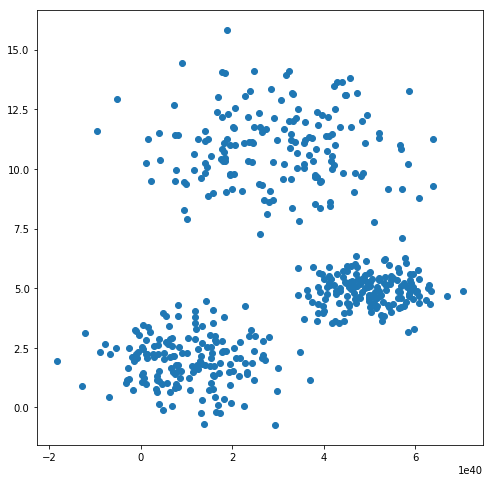

In [48]:
# Ahora los valores del eje horizontal son 100 veces mayores que antes
plot_clusters(X2)

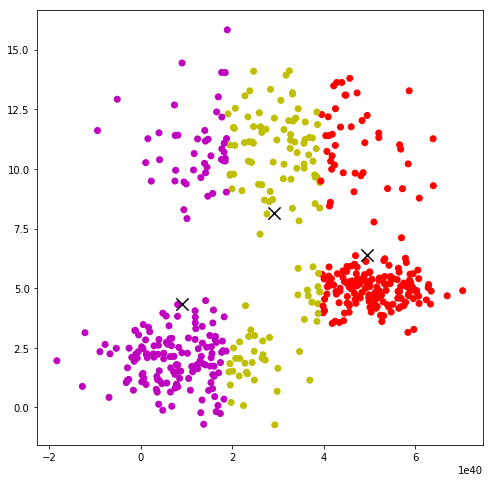

0.5492777752327859


In [50]:
# Usamos k-means
km = KMeans(init='random', n_clusters=3)
km.fit(X2)
plot_clusters(X2, km.labels_, km.cluster_centers_)
print(silhouette_score(X2, km.labels_))

En la gráfica anterior podemos comprobar que la división en clusters se ha hecho en función de la primera coordenada de cada punto (por eso son divisiones verticales). En este caso esa coordenada es 100 veces más importante que la otra a la hora de calcular las distancias.

Para evitar este tipo de comportamientos conviene normalizar o estandarizar los datos como hacemos en el ejemplo siguiente.

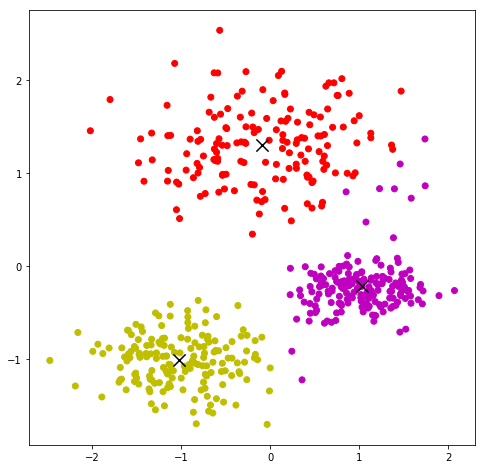

0.6189771951529269


In [51]:
from sklearn.preprocessing import StandardScaler

# Normalizamos los datos para que estén centrados en 0 y con varianza 1
scaler = StandardScaler()
X3 = scaler.fit_transform(X2)

# Aplicamos ahora k-means
km = KMeans(init='random', n_clusters=3)
km.fit(X3)
plot_clusters(X3, km.labels_, km.cluster_centers_)
print(silhouette_score(X3, km.labels_))

## Algoritmo jerárquico aglomerativo

Los algoritmos de agrupamiento jerárquico construyen clusters anidados uniendo o separando otros clusters. La jerarquía de clusters se puede representar en forma de árbol o dendrograma. Los algoritmos aglomerativos construyen los clusters de abajo hacia arriba: inicialmente cada punto es un cluster y se van uniendo para crear clusters más grandes.

Existen distintas estrategias de agrupamiento de clusters que se pueden consultar en la documentación: ward, complete linkage, average linkage o single linkage.

Descripción del algoritmo: https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

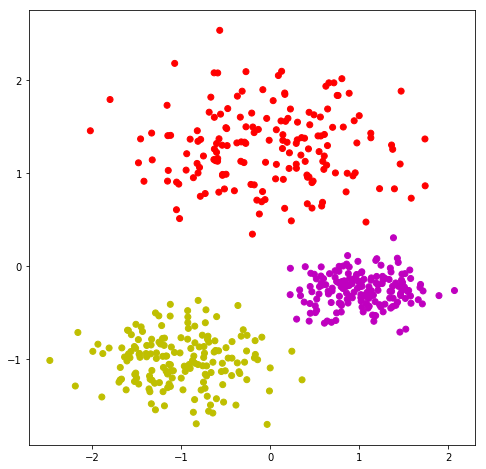

0.6106096394854278

In [54]:
# Crear una instancia del agrupador jerárquico aglomerativo
ag = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Agrupar los puntos en clusters
ag.fit(X_scaled)

# Podemos consultar el cluster asignado a cada punto
labels = ag.labels_

plot_clusters(X_scaled, labels)
silhouette_score(X_scaled, labels)

Al igual que antes, vamos a estudiar como afecta el número de clusters generados al índice Davies-Bouldin que mide cómo de compactos y separados quedan los clusters.

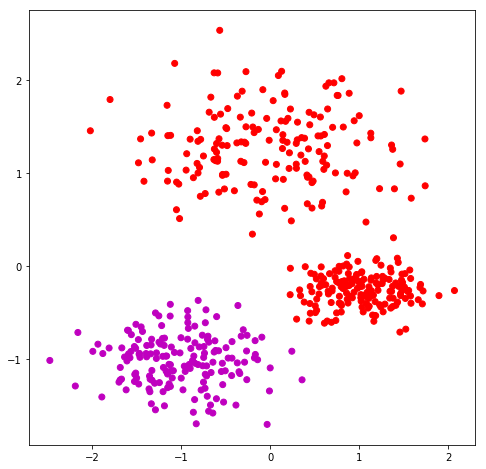

2
0.5098001260783317


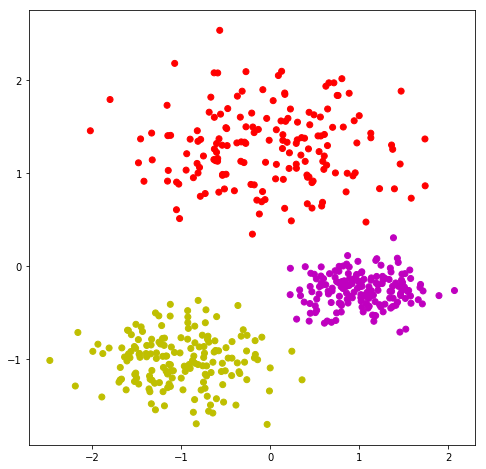

3
0.6106096394854278


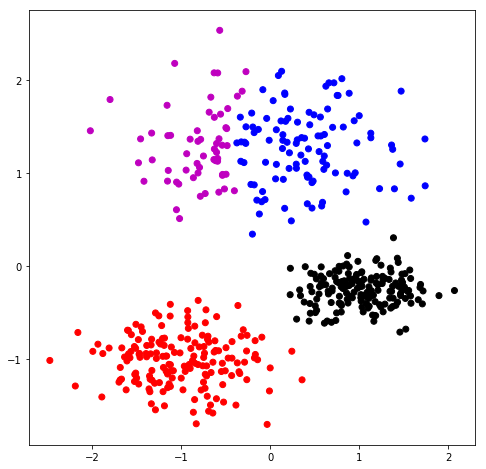

4
0.5790342375430096


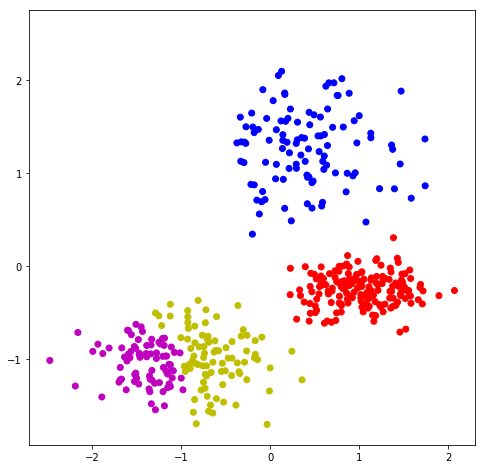

5
0.4951928023226257


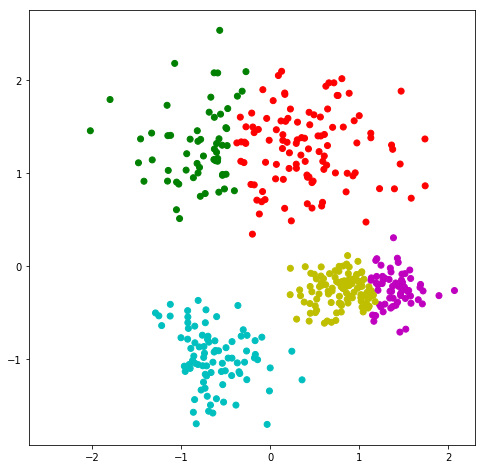

6
0.4063477979778178


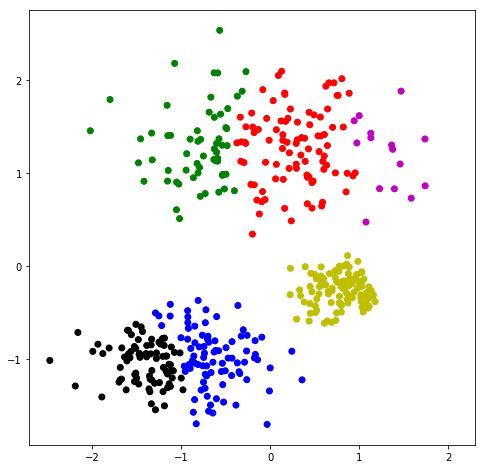

7
0.3946531528876644


In [56]:
K_MAX = 8
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean')
    ag.fit(X_scaled)
    plot_clusters(X_scaled, ag.labels_)
    
    silhouette[k-2] = silhouette_score(X_scaled, ag.labels_) 
    print(k)
    print(silhouette_score(X_scaled, ag.labels_))

Text(0.5, 1.0, 'Valor de Silhouette para diferentes k')

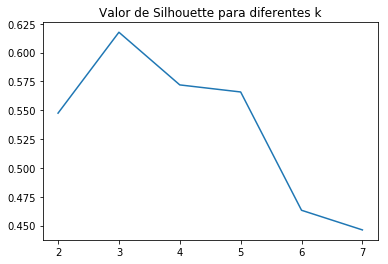

In [15]:
plt.plot(range(2, K_MAX), silhouette)
plt.title('Valor de Silhouette para diferentes k')

Finalmente, vamos a dibujar el dendrograma de la jerarquía de clusters. El árbol completo es demasiado grande (tiene tantas hojas como puntos) así que nos limitaremos a dibujar sólo los primeros niveles del árbol.

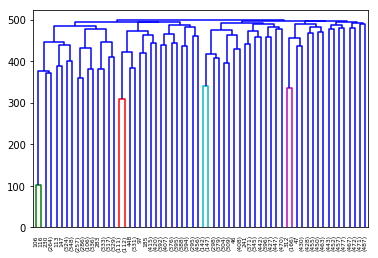

In [16]:
# Sciki-learn no pinta el dendrograma, pero scipy sí, 
# la siguiente función permite usar el modelo ajustado por scikit learn para pintar el dendrograma
# https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    


ag = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
ag.fit(X_scaled)

# Dibujar los primeros 5 niveles del árbol
levels = 5
plot_dendrogram(ag, p=levels, truncate_mode='level')

# Árbol completo
#plot_dendrogram(ag)